In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [ ]:
vaccine=pd.read_csv('/content/h1n1_vaccine_prediction.csv')

In [ ]:
vaccine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   unique_id                  26707 non-null  int64  
 1   h1n1_worry                 26615 non-null  float64
 2   h1n1_awareness             26591 non-null  float64
 3   antiviral_medication       26636 non-null  float64
 4   contact_avoidance          26499 non-null  float64
 5   bought_face_mask           26688 non-null  float64
 6   wash_hands_frequently      26665 non-null  float64
 7   avoid_large_gatherings     26620 non-null  float64
 8   reduced_outside_home_cont  26625 non-null  float64
 9   avoid_touch_face           26579 non-null  float64
 10  dr_recc_h1n1_vacc          24547 non-null  float64
 11  dr_recc_seasonal_vacc      24547 non-null  float64
 12  chronic_medic_condition    25736 non-null  float64
 13  cont_child_undr_6_mnths    25887 non-null  flo

In [ ]:
vaccine.describe()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,has_health_insur,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,no_of_adults,no_of_children,h1n1_vaccine
count,26707.000000,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,...,14433.00000,26316.000000,26319.000000,26312.000000,26245.000000,26193.000000,26170.000000,26458.000000,26458.000000,26707.000000
mean,13353.000000,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,...,0.87972,3.850623,2.342566,2.357670,4.025986,2.719162,2.118112,0.886499,0.534583,0.212454
std,7709.791156,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,...,0.32530,1.007436,1.285539,1.362766,1.086565,1.385055,1.332950,0.753422,0.928173,0.409052
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,6676.500000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,...,1.00000,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,13353.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,...,1.00000,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000,0.000000
75%,20029.500000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,...,1.00000,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,1.000000,1.000000,0.000000
max,26706.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,1.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000,1.000000


In [ ]:
vaccine.head()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0


Uni-Variate Analysis

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:453: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=figsize)


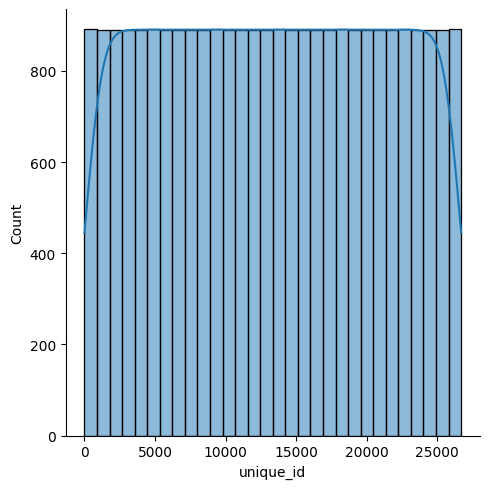

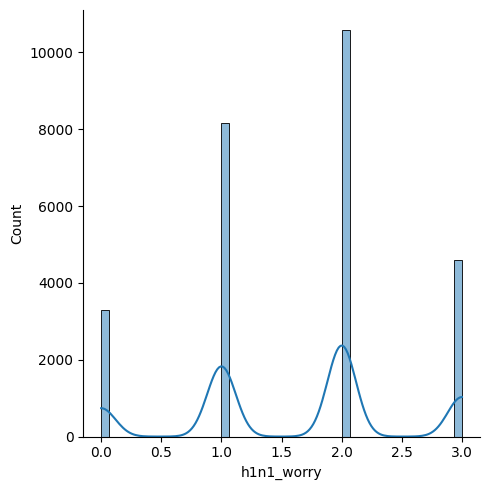

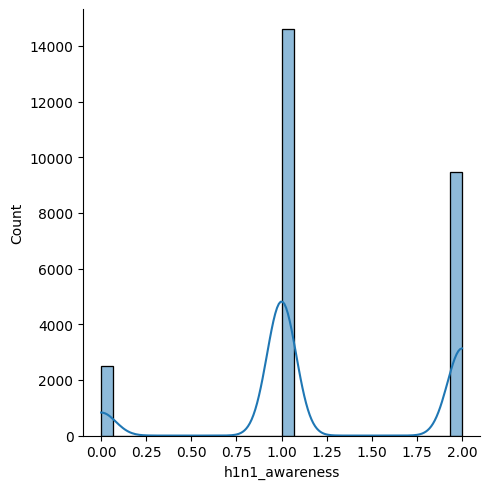

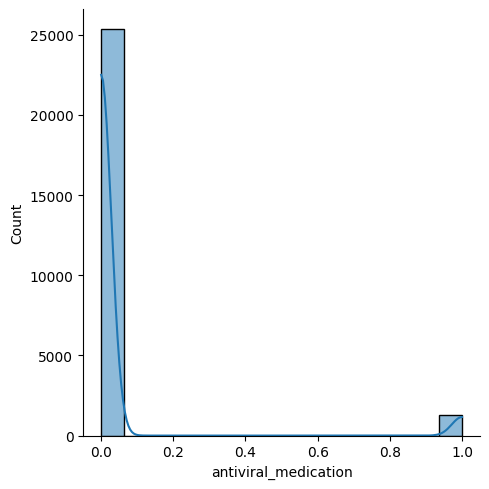

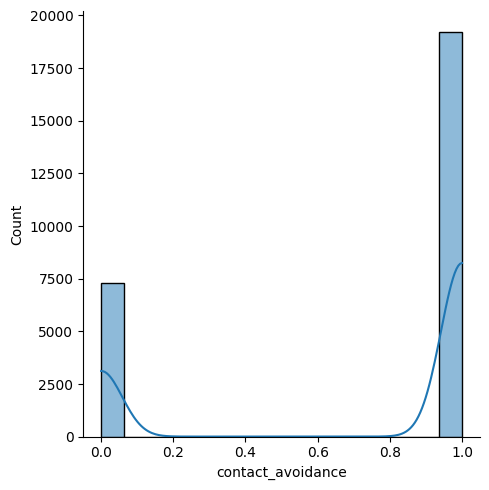

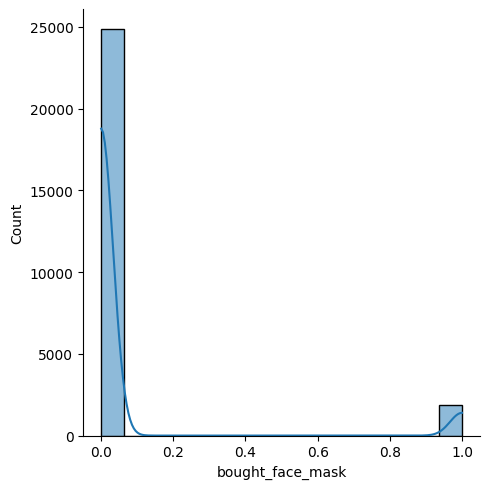

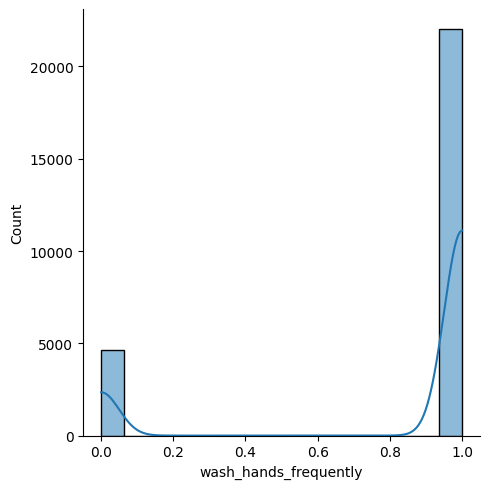

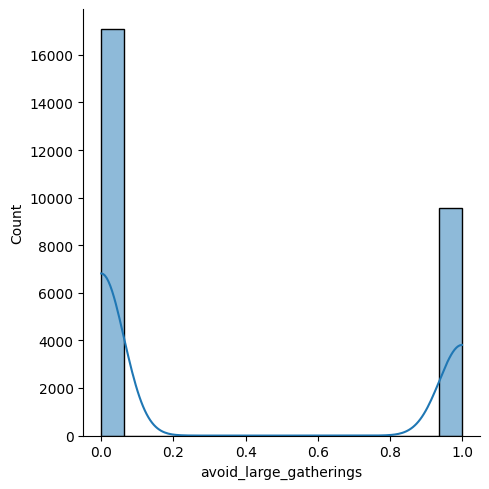

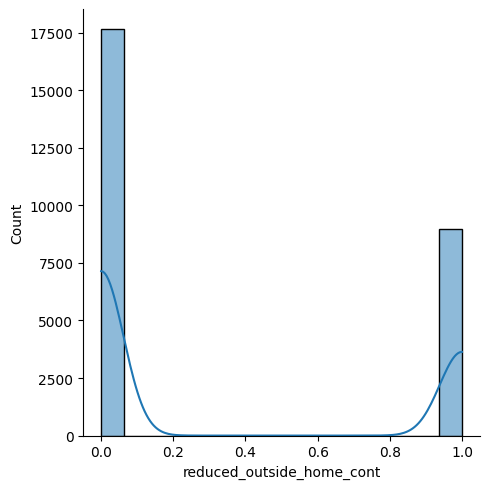

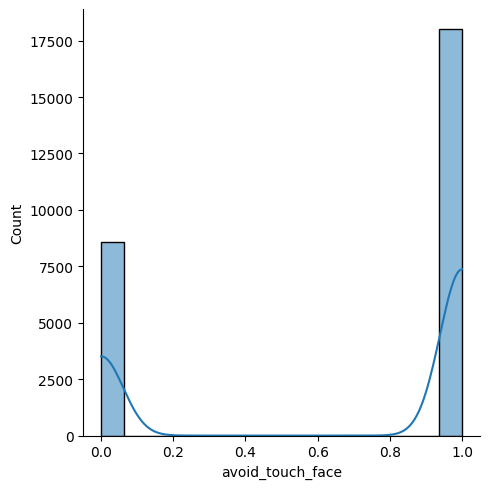

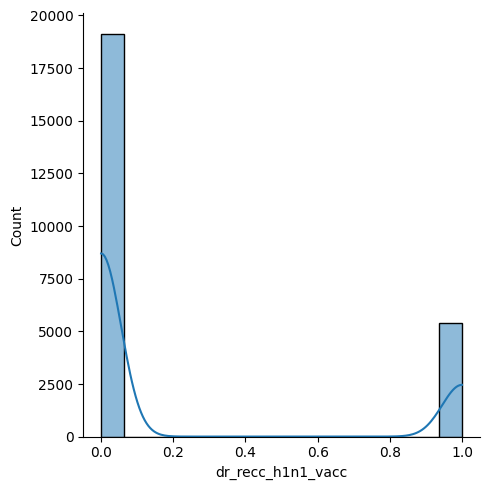

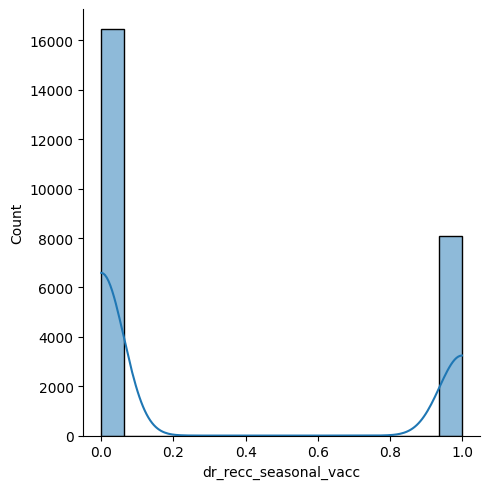

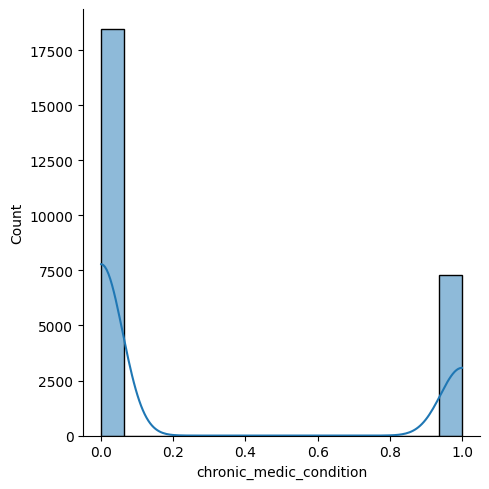

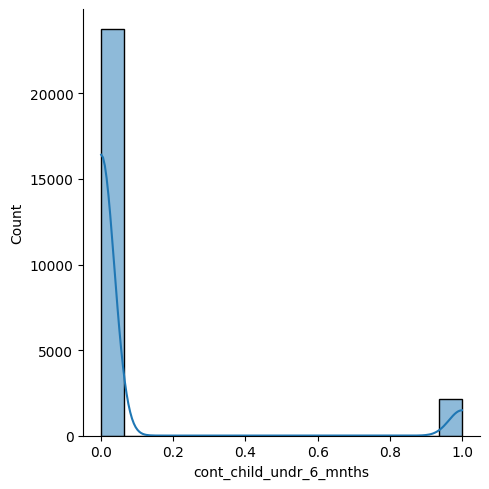

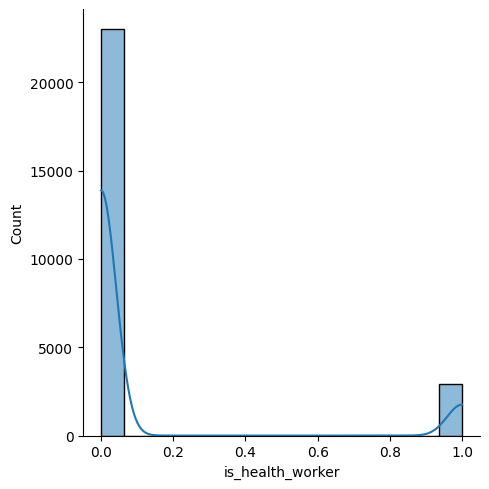

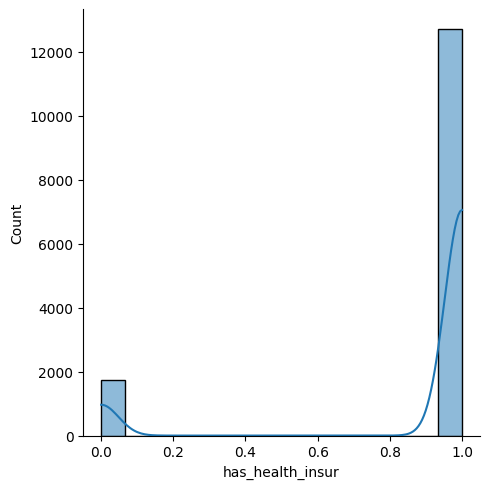

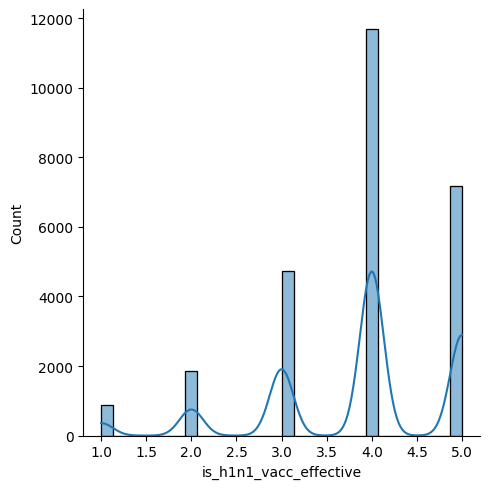

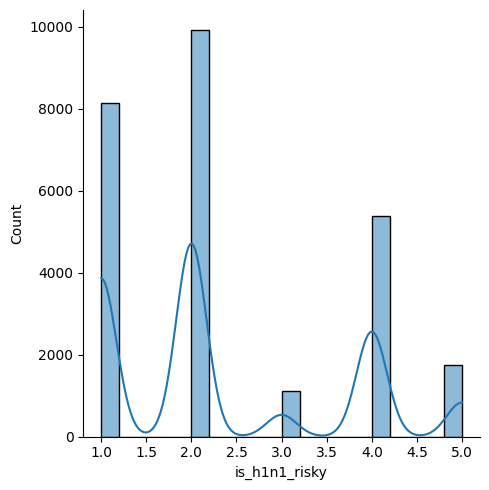

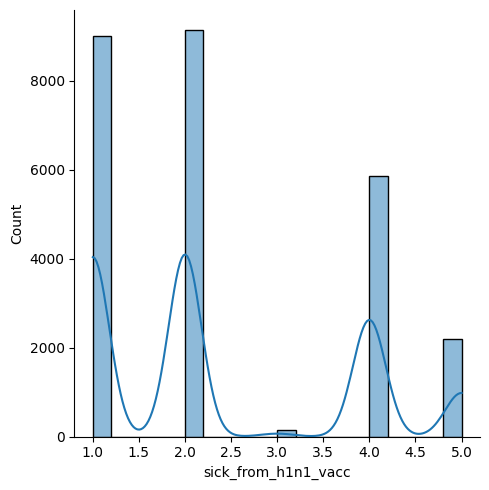

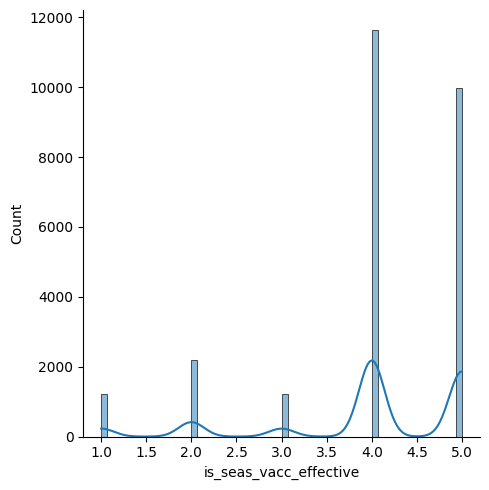

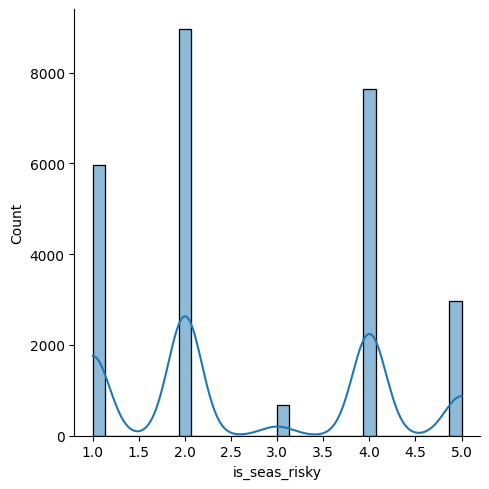

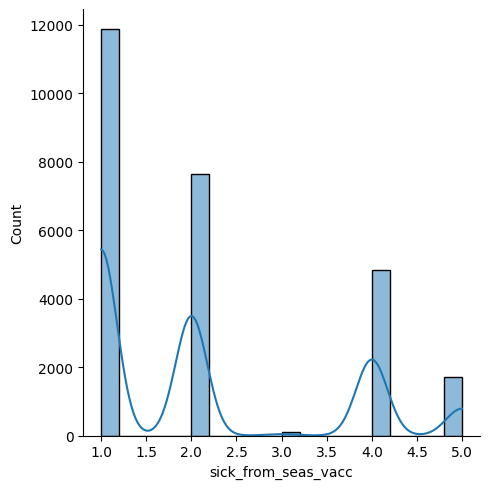

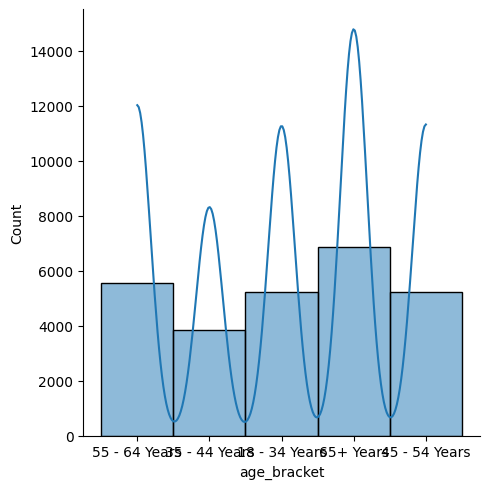

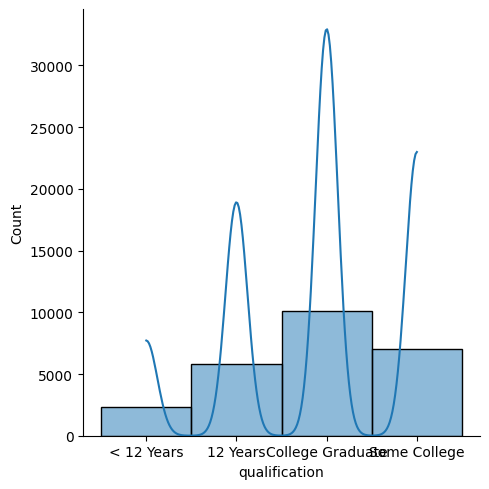

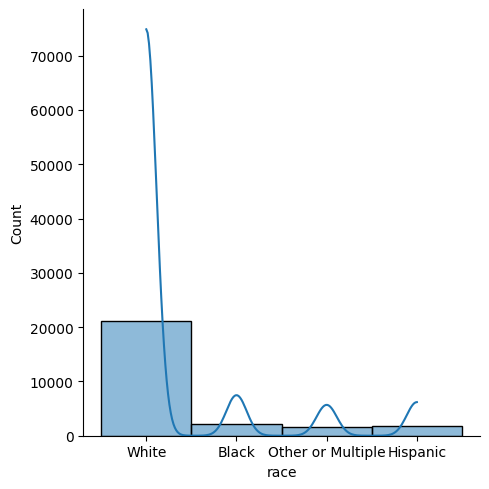

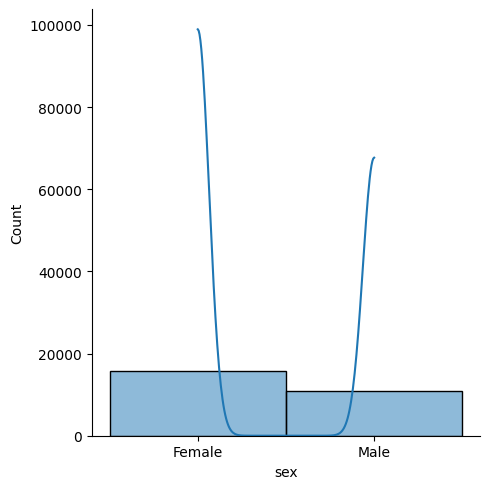

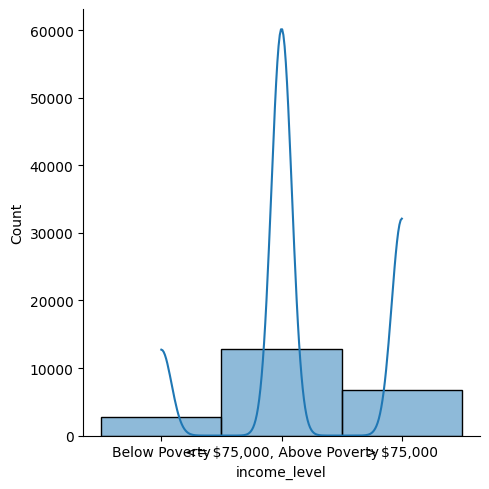

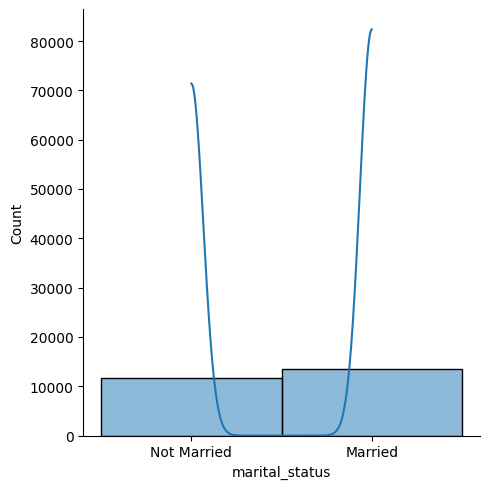

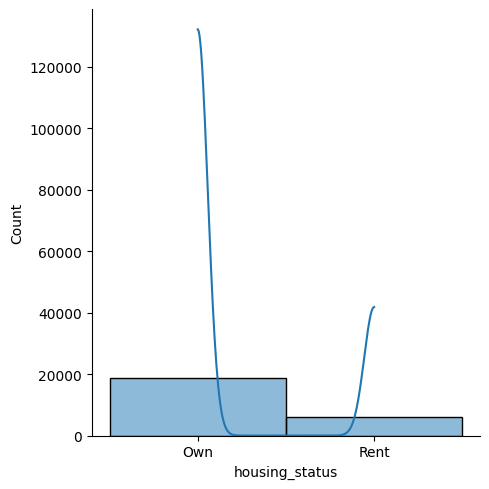

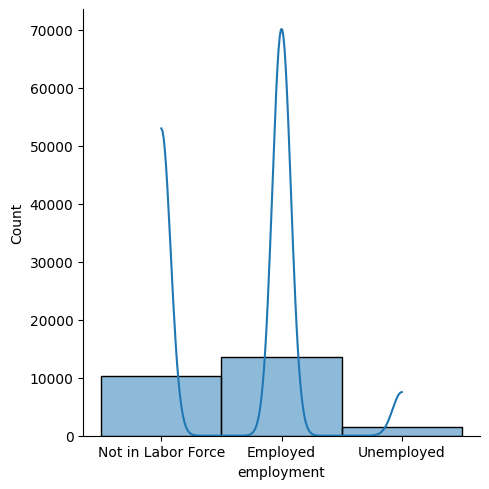

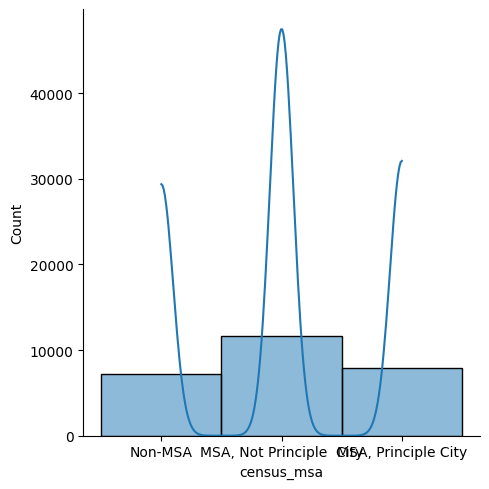

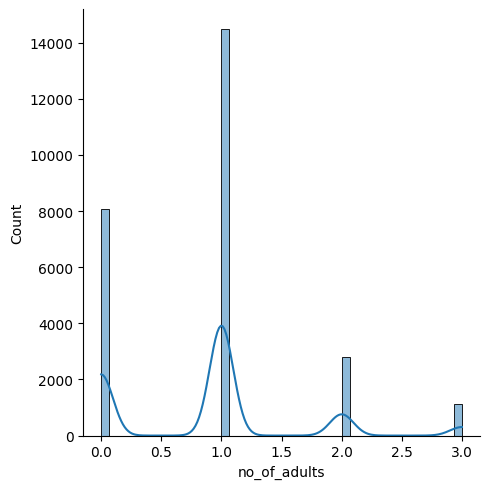

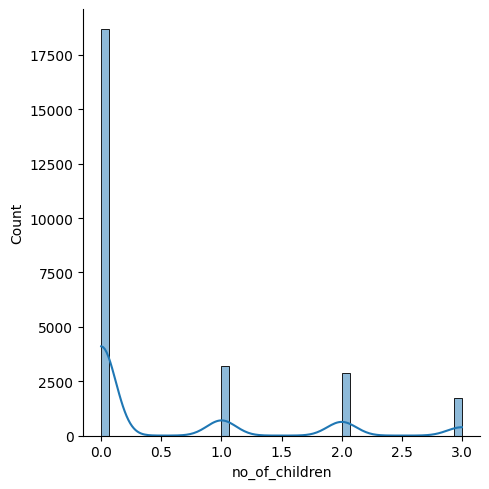

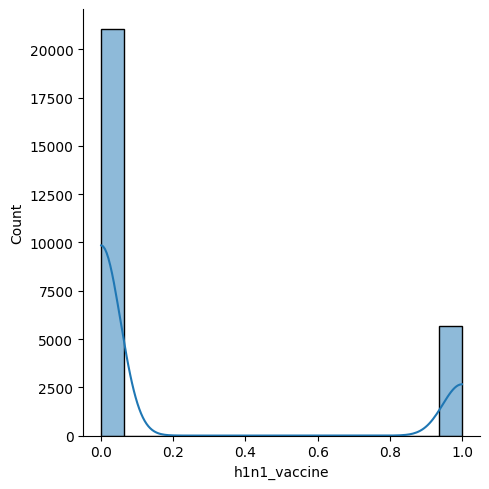

In [ ]:
for i in vaccine.columns:
  sns.displot(x=vaccine[i],kde=True)

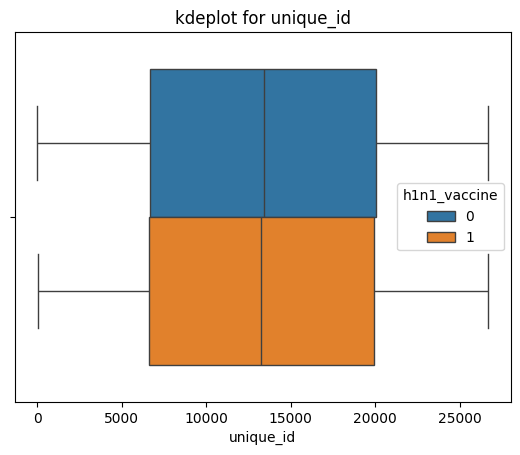

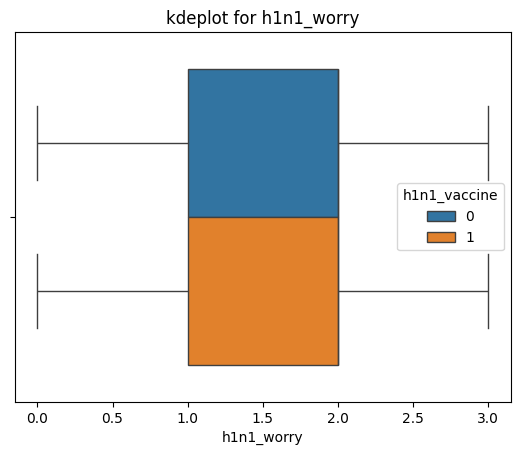

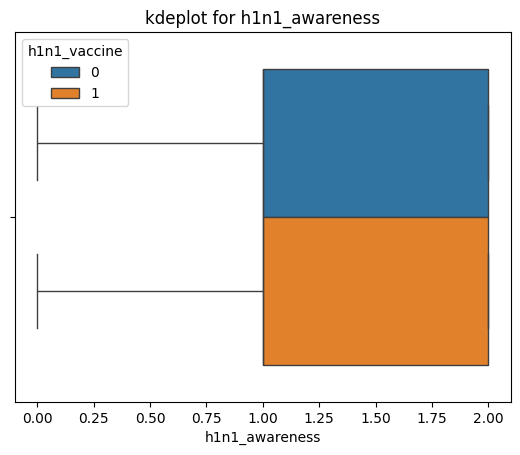

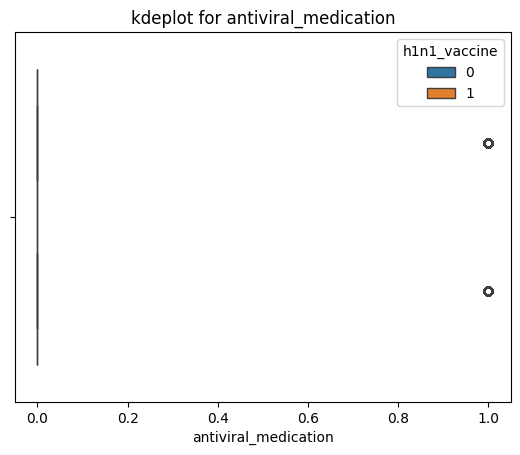

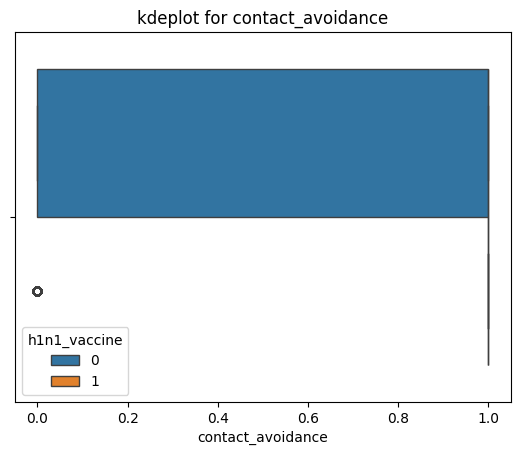

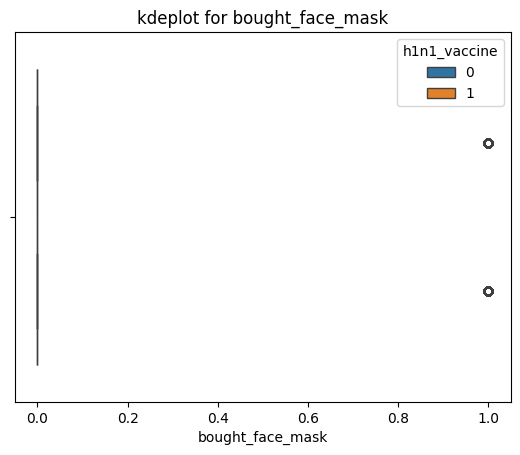

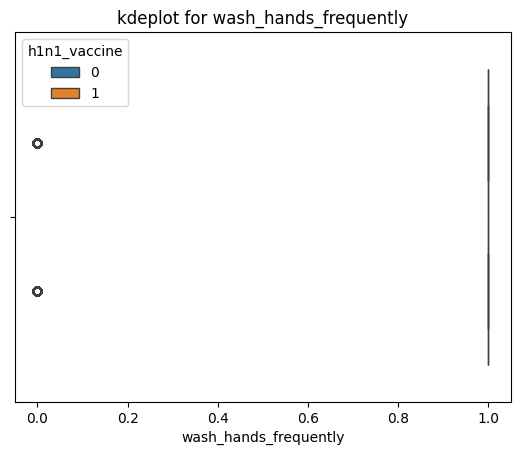

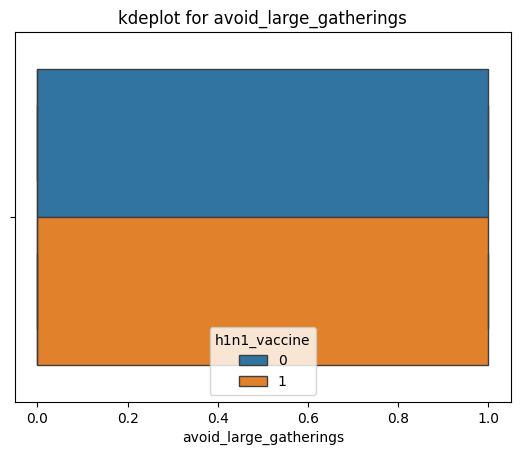

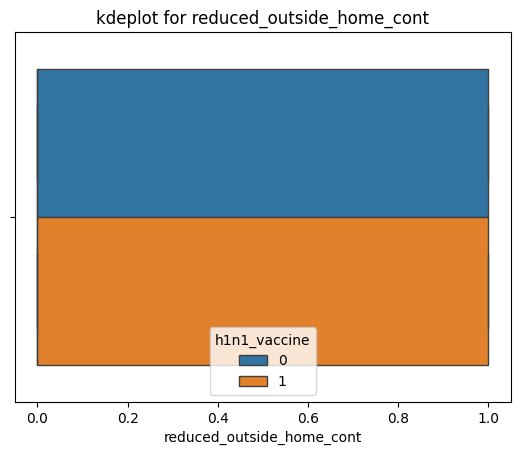

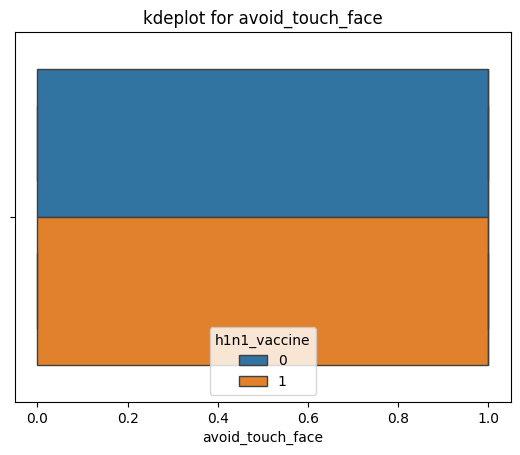

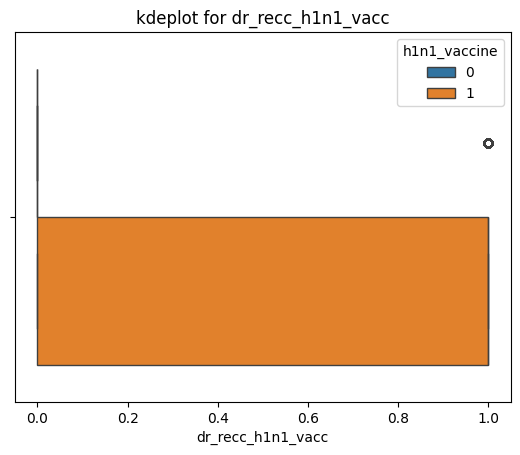

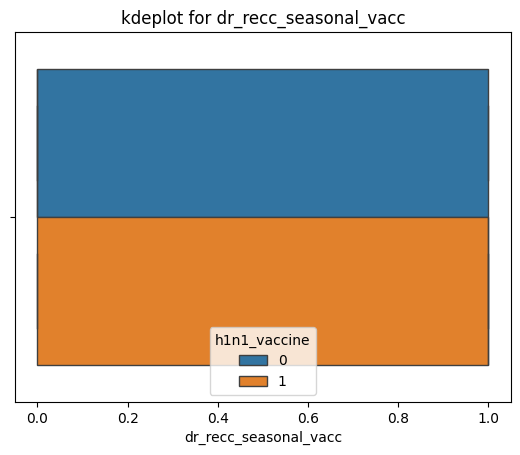

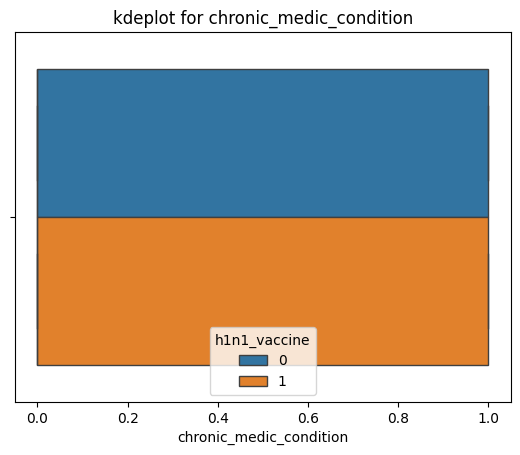

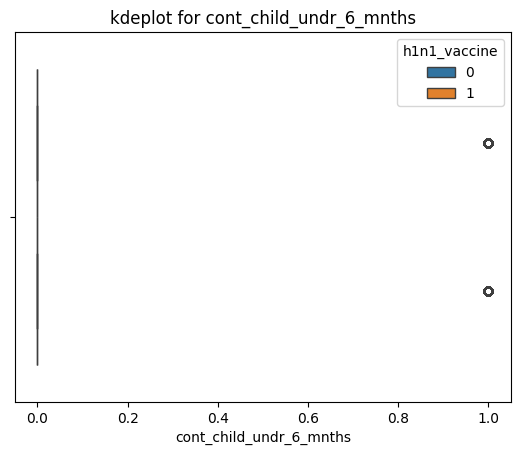

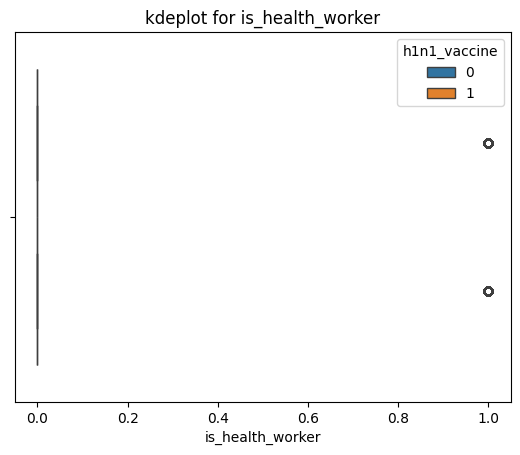

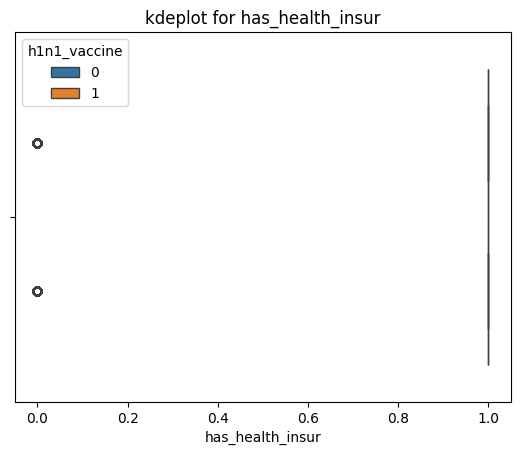

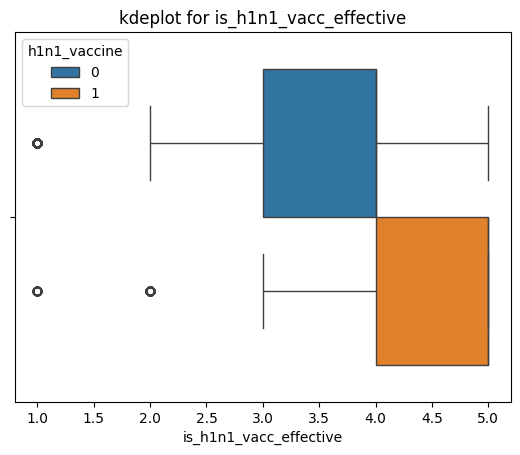

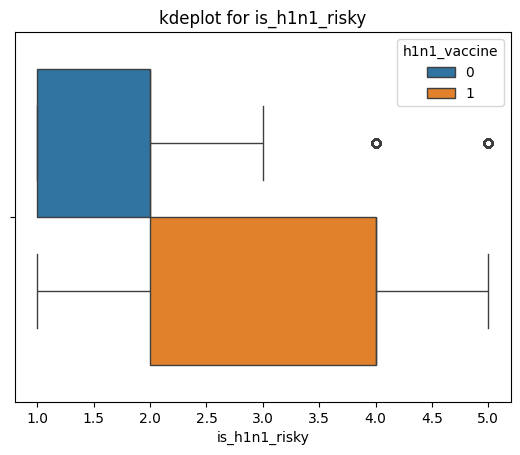

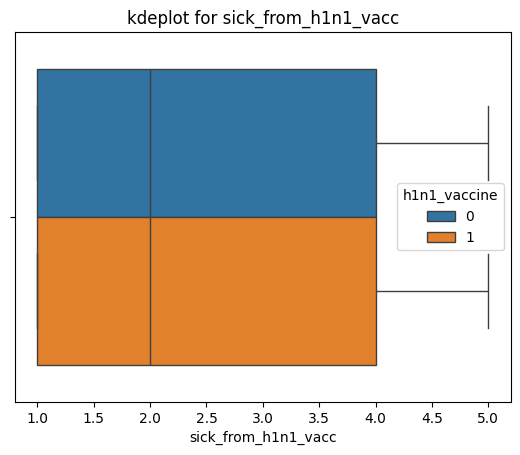

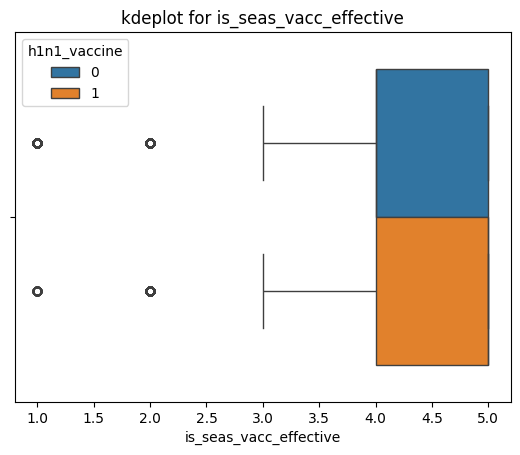

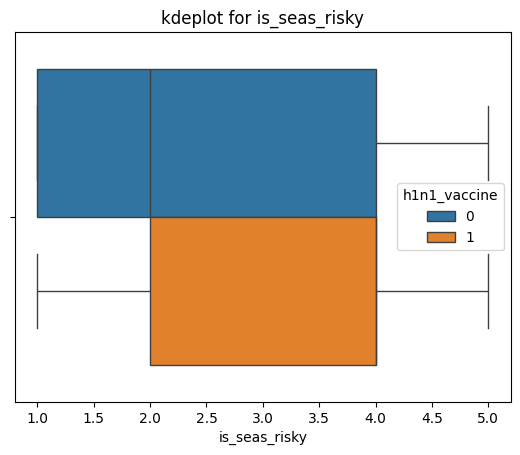

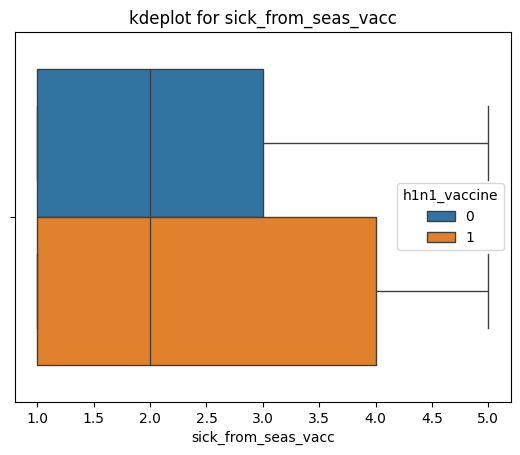

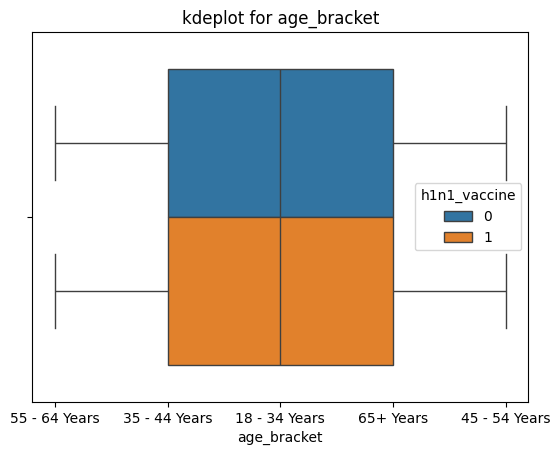

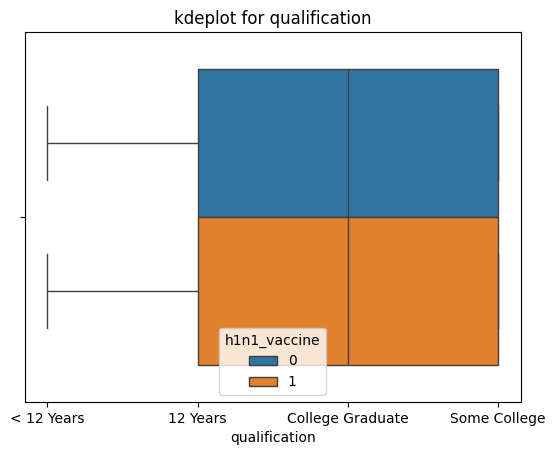

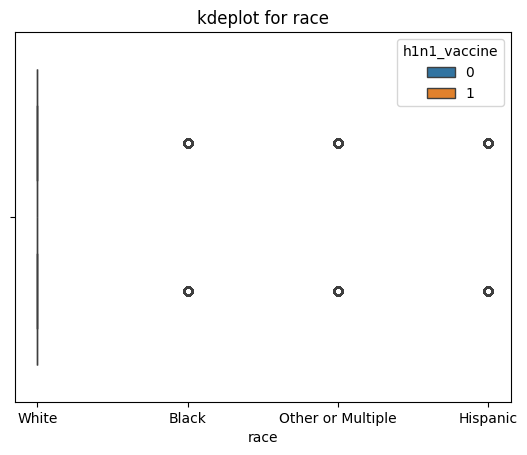

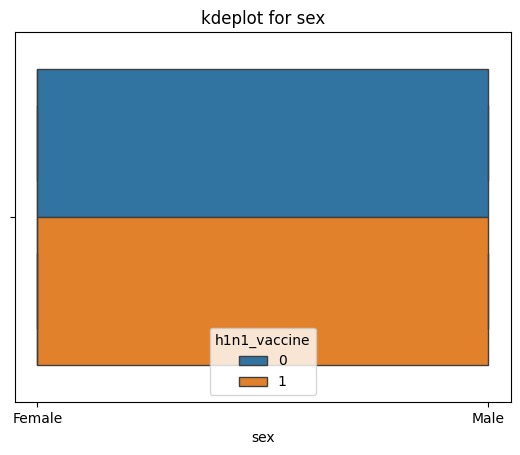

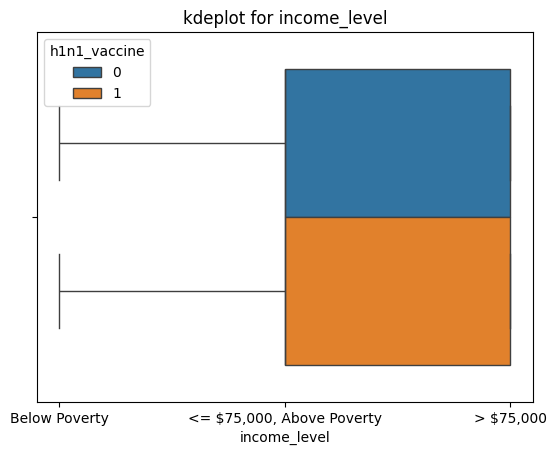

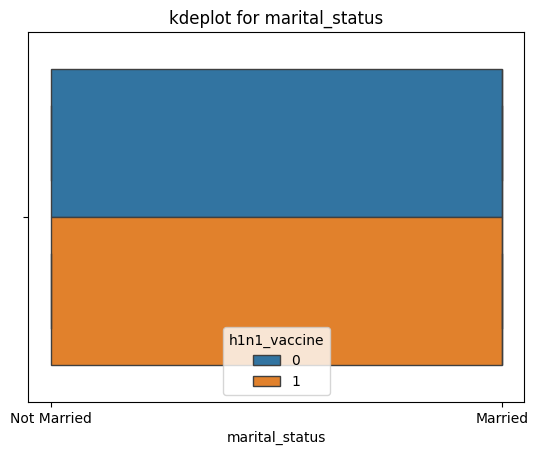

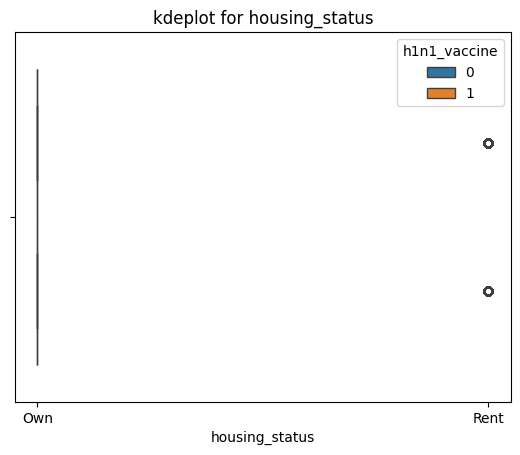

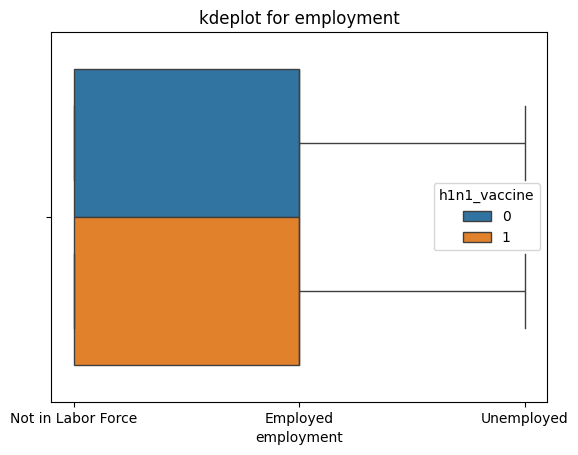

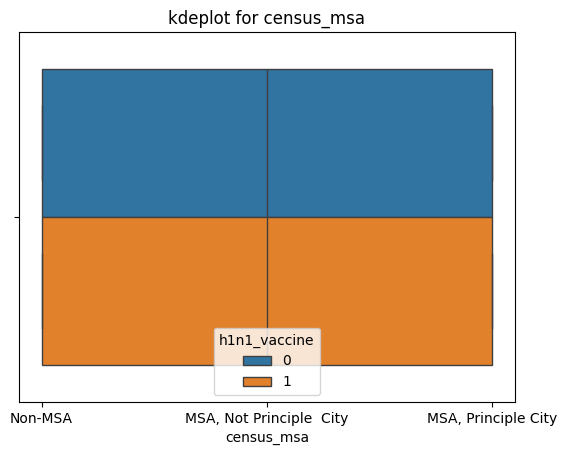

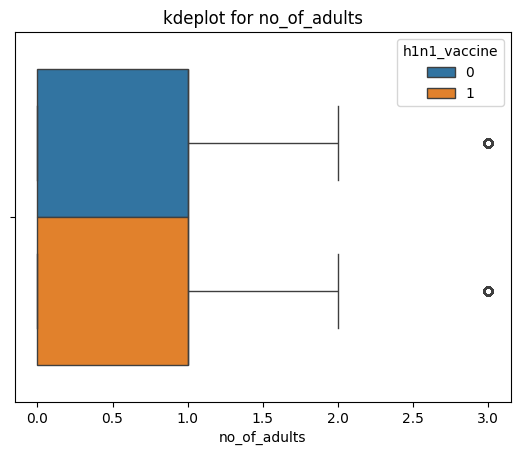

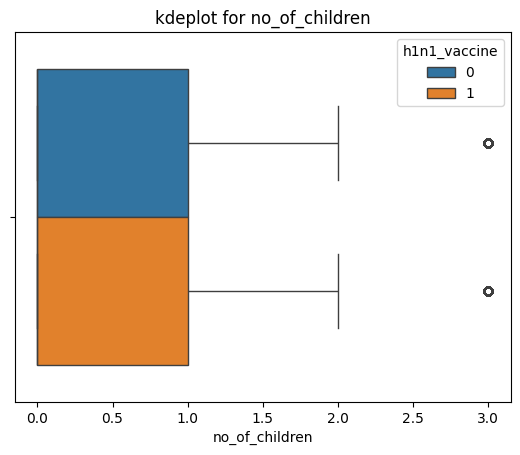

In [ ]:
for i in vaccine.columns:
  if i!='h1n1_vaccine':
     sns.boxplot(x=vaccine[i],hue=vaccine['h1n1_vaccine'])
     plt.title(f"kdeplot for {i}")
     plt.show()

Bi-variate Analysis

<ipython-input-8-e41a2fbef2bd>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(vaccine.corr(),annot=True)


<Axes: >

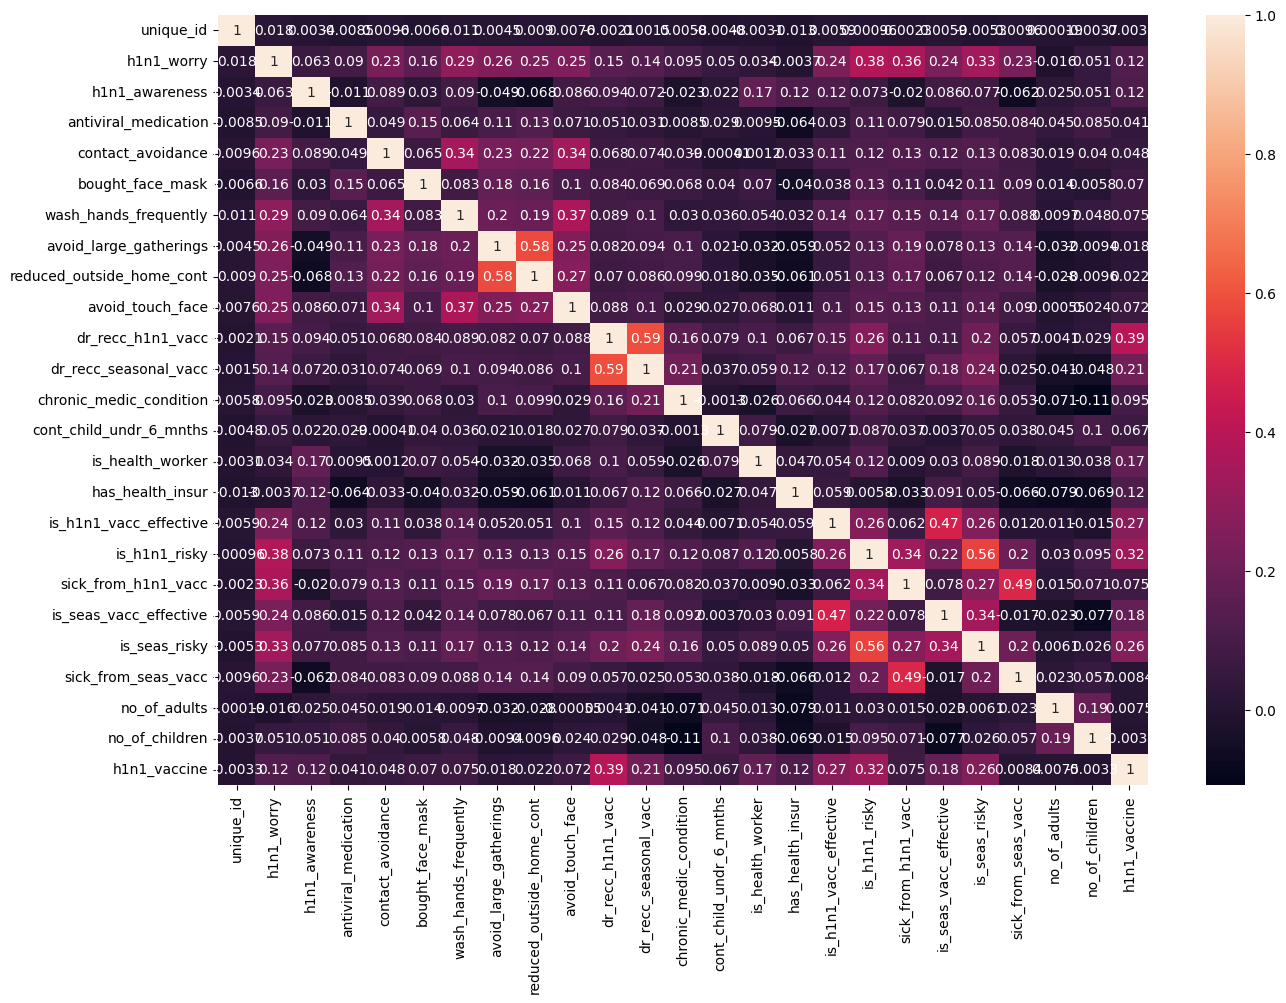

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(vaccine.corr(),annot=True)

In [ ]:
from scipy.stats import chi2_contingency
def chi2sq_test(var1,var2):
  table=pd.crosstab(var1,var2)
  _,p,_,_=chi2_contingency(table)
  if p<=0.05:
    print("Accept the Alternate Hypothesis",round(p,2))
  else:
    print("Accept the Null Hypothesis",round(p,2))
  return table

In [ ]:
chi2sq_test(vaccine['h1n1_worry'],vaccine['h1n1_vaccine'])

Accept the Alternate Hypothesis 0.0


h1n1_vaccine,0,1
h1n1_worry,,
0.0,2849,447
1.0,6756,1397
2.0,8102,2473
3.0,3250,1341


In [ ]:
chi2sq_test(vaccine['is_h1n1_vacc_effective'],vaccine['h1n1_vaccine'])

Accept the Alternate Hypothesis 0.0


h1n1_vaccine,0,1
is_h1n1_vacc_effective,,
1.0,844,42
2.0,1763,95
3.0,4224,499
4.0,9622,2061
5.0,4265,2901


In [ ]:
chi2sq_test(vaccine['age_bracket'],vaccine['h1n1_vaccine'])

Accept the Alternate Hypothesis 0.0


h1n1_vaccine,0,1
age_bracket,,
18 - 34 Years,4224,991
35 - 44 Years,3087,761
45 - 54 Years,4218,1020
55 - 64 Years,4212,1351
65+ Years,5292,1551


Data Preparation

In [ ]:
def data_prep(data):
    for i in data.columns:
        if data[i].dtype == 'object':
            data[i] = np.where(data[i].isna(), data[i].mode(dropna=True)[0], data[i])
        elif data[i].dtype == 'float':
            data[i] = np.where(data[i].isna(), data[i].median(skipna=True), data[i])
    return data


In [ ]:
data_prep(vaccine)

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Rent,Employed,"MSA, Principle City",1.0,0.0,0
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",0.0,0.0,0
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,Hispanic,Female,"<= $75,000, Above Poverty",Married,Rent,Employed,Non-MSA,1.0,0.0,0


In [ ]:
vaccine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   unique_id                  26707 non-null  int64  
 1   h1n1_worry                 26707 non-null  float64
 2   h1n1_awareness             26707 non-null  float64
 3   antiviral_medication       26707 non-null  float64
 4   contact_avoidance          26707 non-null  float64
 5   bought_face_mask           26707 non-null  float64
 6   wash_hands_frequently      26707 non-null  float64
 7   avoid_large_gatherings     26707 non-null  float64
 8   reduced_outside_home_cont  26707 non-null  float64
 9   avoid_touch_face           26707 non-null  float64
 10  dr_recc_h1n1_vacc          26707 non-null  float64
 11  dr_recc_seasonal_vacc      26707 non-null  float64
 12  chronic_medic_condition    26707 non-null  float64
 13  cont_child_undr_6_mnths    26707 non-null  flo

In [ ]:
for i in vaccine.columns:
    vaccine['age_bracket'].replace('55 - 64 Years', 64 - 55, inplace=True)
    vaccine['age_bracket'].replace('35 - 44 Years', 44 - 35, inplace=True)
    vaccine['age_bracket'].replace('18 - 34 Years', 34 - 18, inplace=True)
    vaccine['age_bracket'].replace('65+ Years', 65, inplace=True)
    vaccine['age_bracket'].replace('45 - 54 Years', 54 - 45, inplace=True)
    if vaccine[i].dtype=='float':
      vaccine[i] = vaccine[i].astype('int')




In [ ]:
vaccine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   unique_id                  26707 non-null  int64 
 1   h1n1_worry                 26707 non-null  int64 
 2   h1n1_awareness             26707 non-null  int64 
 3   antiviral_medication       26707 non-null  int64 
 4   contact_avoidance          26707 non-null  int64 
 5   bought_face_mask           26707 non-null  int64 
 6   wash_hands_frequently      26707 non-null  int64 
 7   avoid_large_gatherings     26707 non-null  int64 
 8   reduced_outside_home_cont  26707 non-null  int64 
 9   avoid_touch_face           26707 non-null  int64 
 10  dr_recc_h1n1_vacc          26707 non-null  int64 
 11  dr_recc_seasonal_vacc      26707 non-null  int64 
 12  chronic_medic_condition    26707 non-null  int64 
 13  cont_child_undr_6_mnths    26707 non-null  int64 
 14  is_hea

In [ ]:
vaccine['age_bracket'].head()

0     9
1     9
2    16
3    65
4     9
Name: age_bracket, dtype: int64

Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
def encode(data):
  le=LabelEncoder()
  for i in data.columns:
    if data[i].dtype=='object':
      data[i]=le.fit_transform(data[i])
  return(data)

In [ ]:
encode(vaccine)

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1,0,0,0,0,0,0,1,1,...,3,0,2,1,0,1,2,0,0,0
1,1,3,2,0,1,0,1,0,1,1,...,3,1,2,1,1,0,0,0,0,0
2,2,1,1,0,1,0,0,0,0,0,...,3,1,0,1,0,0,0,2,0,0
3,3,1,1,0,1,0,1,1,0,0,...,3,0,2,1,1,1,1,0,0,0
4,4,2,1,0,1,0,1,1,0,1,...,3,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,2,0,0,1,0,0,0,1,0,...,3,0,0,1,0,1,2,0,0,0
26703,26703,1,2,0,1,0,1,0,0,0,...,3,1,0,1,1,0,1,1,0,0
26704,26704,2,2,0,1,1,1,1,0,1,...,3,0,0,1,0,0,0,0,0,0
26705,26705,1,1,0,0,0,0,0,0,1,...,1,0,0,0,1,0,2,1,0,0


Splitting into x and y

In [ ]:
x=vaccine.drop(['unique_id','h1n1_vaccine'],axis=1)
y=vaccine['h1n1_vaccine']

Train and Test

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=123)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(21365, 32)
(5342, 32)
(21365,)
(5342,)


Logistic Regression

In [ ]:
logreg=LogisticRegression()
logreg.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_hat_train_logreg=logreg.predict(x_train)
y_hat_test_logreg=logreg.predict(x_test)

In [ ]:
def model_eval(actual,predicted):
  conf_matrix=confusion_matrix(actual,predicted)
  class_report=classification_report(actual,predicted)
  acc_score=accuracy_score(actual,predicted)
  print("Accuracy score",round(acc_score,2))
  print(conf_matrix)
  print(class_report)

In [ ]:
model_eval(y_train,y_hat_train_logreg)

Accuracy score 0.83
[[15931   911]
 [ 2636  1887]]
              precision    recall  f1-score   support

           0       0.86      0.95      0.90     16842
           1       0.67      0.42      0.52      4523

    accuracy                           0.83     21365
   macro avg       0.77      0.68      0.71     21365
weighted avg       0.82      0.83      0.82     21365



In [ ]:
model_eval(y_test,y_hat_test_logreg)

Accuracy score 0.83
[[3947  244]
 [ 678  473]]
              precision    recall  f1-score   support

           0       0.85      0.94      0.90      4191
           1       0.66      0.41      0.51      1151

    accuracy                           0.83      5342
   macro avg       0.76      0.68      0.70      5342
weighted avg       0.81      0.83      0.81      5342

